In [56]:
import pandas as pd


def load_dataframe_pairs(option):
    mongo_file_path = f'../data/clean/mongo/{option}.csv'
    redis_file_path = f'../data/clean/redis/{option}.csv'

    mongo_df = pd.read_csv(mongo_file_path)
    redis_df = pd.read_csv(redis_file_path)

    return [(mongo_df, redis_df)]

In [57]:
mongo_df = pd.read_csv('../data/clean/mongo/run_3_10_90.csv')
redis_df = pd.read_csv('../data/clean/redis/load_3_10_90.csv')


In [58]:
mongo_df.columns

Index(['[OVERALL] RunTime(ms)', '[OVERALL] Throughput(ops/sec)',
       '[TOTAL_GCS_PS_Scavenge] Count', '[TOTAL_GC_TIME_PS_Scavenge] Time(ms)',
       '[TOTAL_GC_TIME_%_PS_Scavenge] Time(%)',
       '[TOTAL_GCS_PS_MarkSweep] Count',
       '[TOTAL_GC_TIME_PS_MarkSweep] Time(ms)',
       '[TOTAL_GC_TIME_%_PS_MarkSweep] Time(%)', '[TOTAL_GCs] Count',
       '[TOTAL_GC_TIME] Time(ms)', '[TOTAL_GC_TIME_%] Time(%)',
       '[READ] Operations', '[READ] AverageLatency(us)',
       '[READ] MinLatency(us)', '[READ] MaxLatency(us)',
       '[READ] 95thPercentileLatency(us)', '[READ] 99thPercentileLatency(us)',
       '[READ] Return=OK', '[CLEANUP] Operations',
       '[CLEANUP] AverageLatency(us)', '[CLEANUP] MinLatency(us)',
       '[CLEANUP] MaxLatency(us)', '[CLEANUP] 95thPercentileLatency(us)',
       '[CLEANUP] 99thPercentileLatency(us)', '[UPDATE] Operations',
       '[UPDATE] AverageLatency(us)', '[UPDATE] MinLatency(us)',
       '[UPDATE] MaxLatency(us)', '[UPDATE] 95thPercentileLatency

In [59]:
import matplotlib.pyplot as plt

KeyError: '[INSERT] AverageLatency(us)'

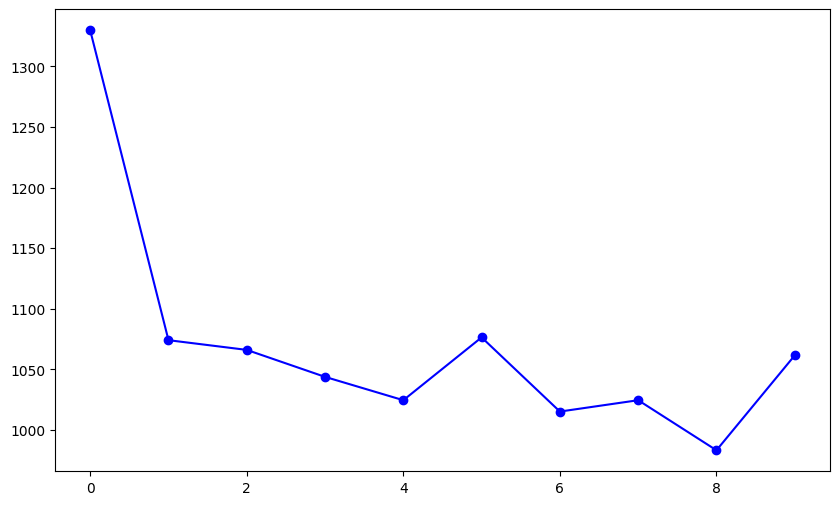

In [60]:
throughput = "[OVERALL] Throughput(ops/sec)"
average_latency = "[INSERT] AverageLatency(us)"

plt.figure(figsize=(10, 6))
plt.plot(mongo_df[throughput], marker='o', color='b', linestyle='-', label='Throughput')
plt.plot(mongo_df[average_latency], marker='o', color='r', linestyle='-', label='Average Latency')
plt.title('Throughput')
plt.xlabel('Iteration')
plt.ylabel('Throughput')
plt.grid(True)
plt.show()

In [61]:
def display_compared_attribute(df_mongo, df_redis, attribute, option):
    plt.figure(figsize=(10, 6))
    plt.plot(df_mongo[attribute], marker='o', color='g', linestyle='-', label='Mongo')
    plt.plot(df_redis[attribute], marker='o', color='r', linestyle='-', label='Redis')
    plt.title(attribute + " for " + option)
    plt.xlabel('Iteration')
    plt.ylabel('attribute')
    plt.grid(True)
    plt.legend()
    plt.show()

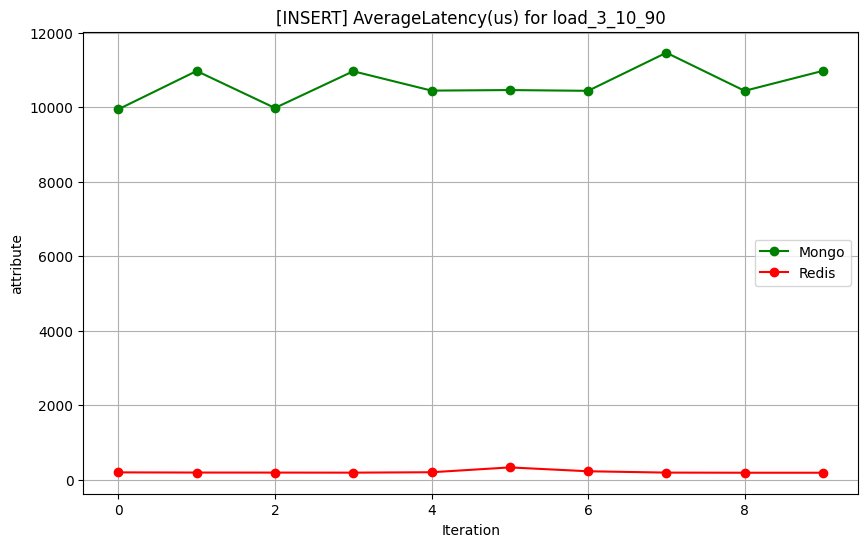

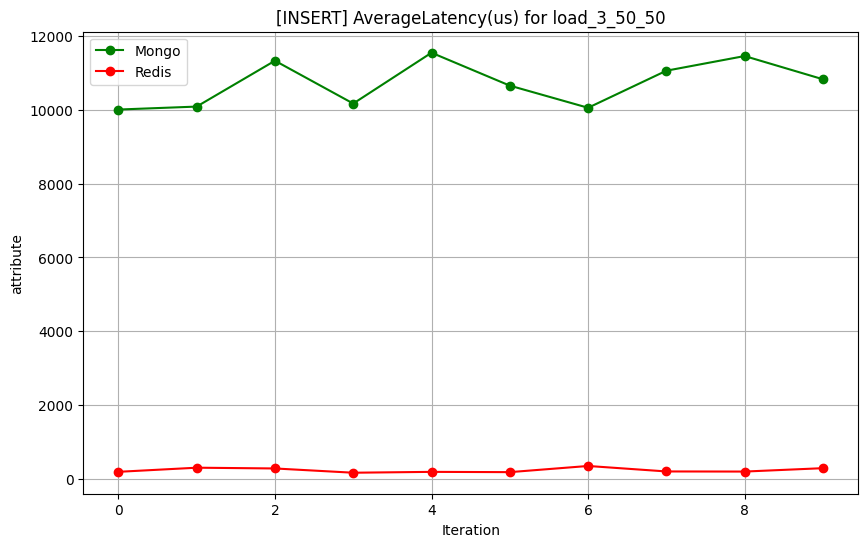

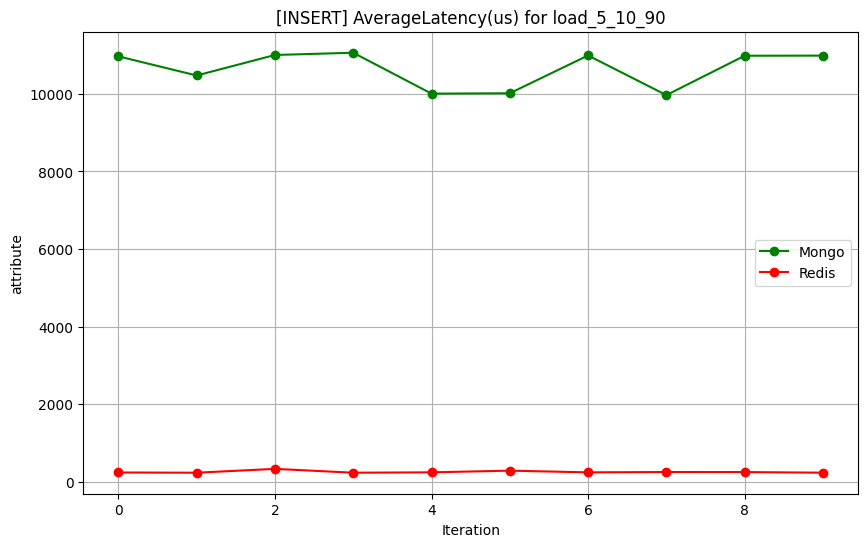

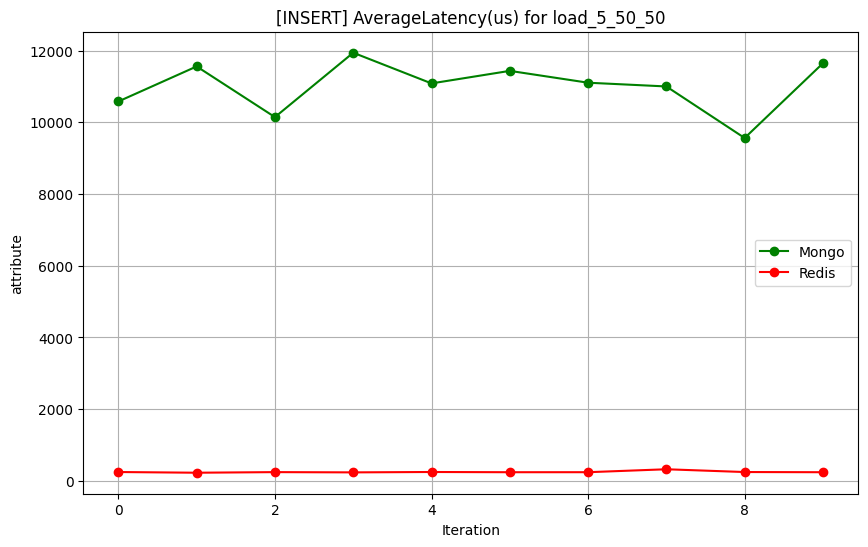

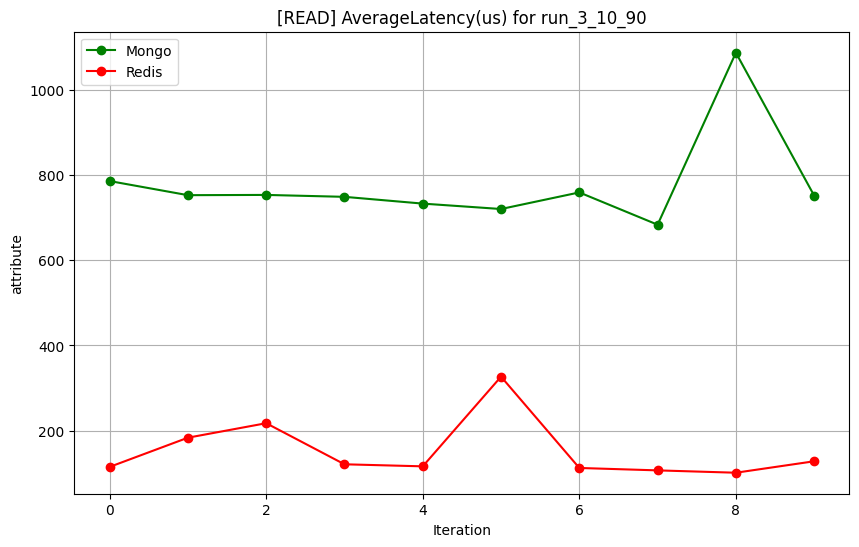

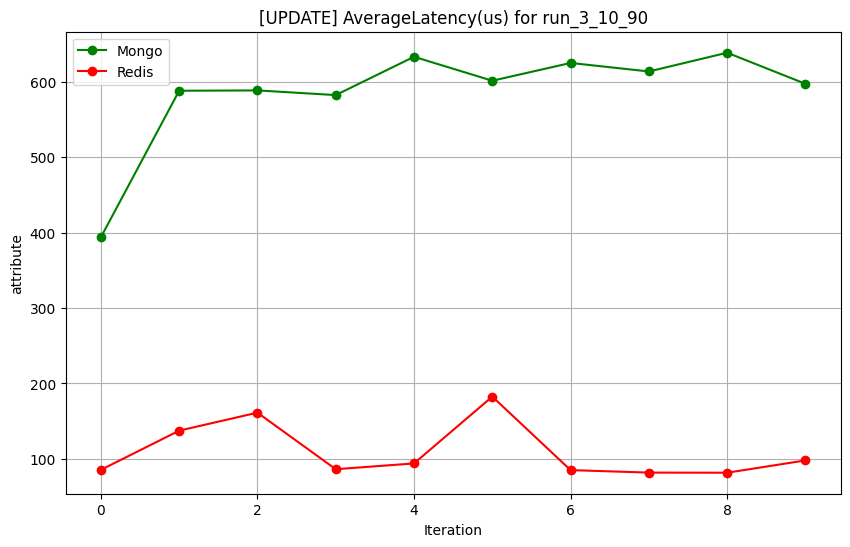

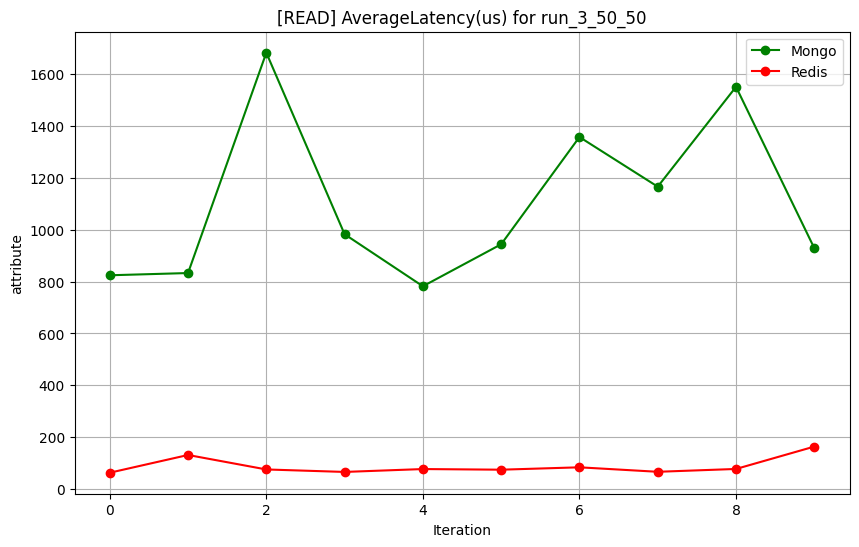

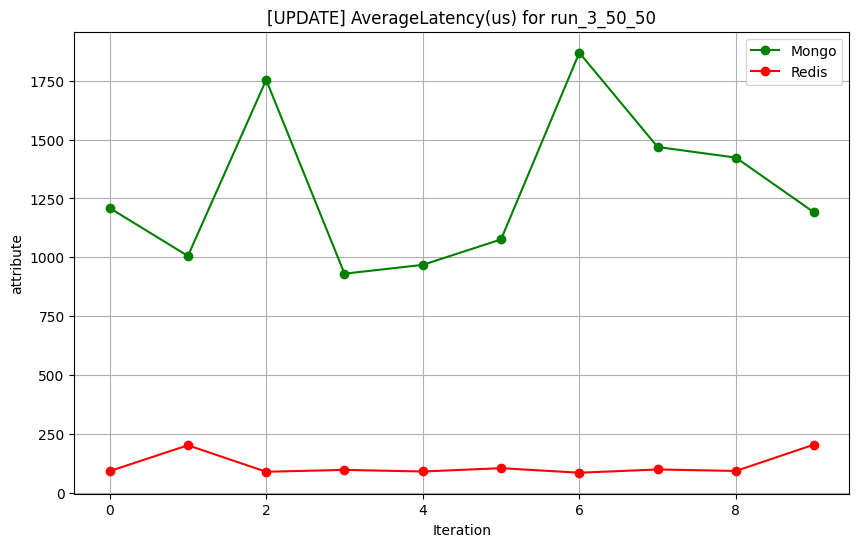

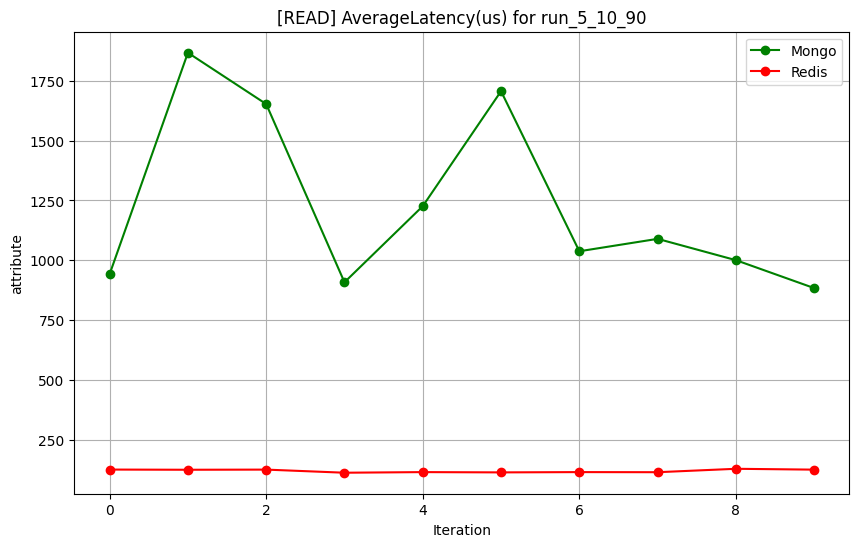

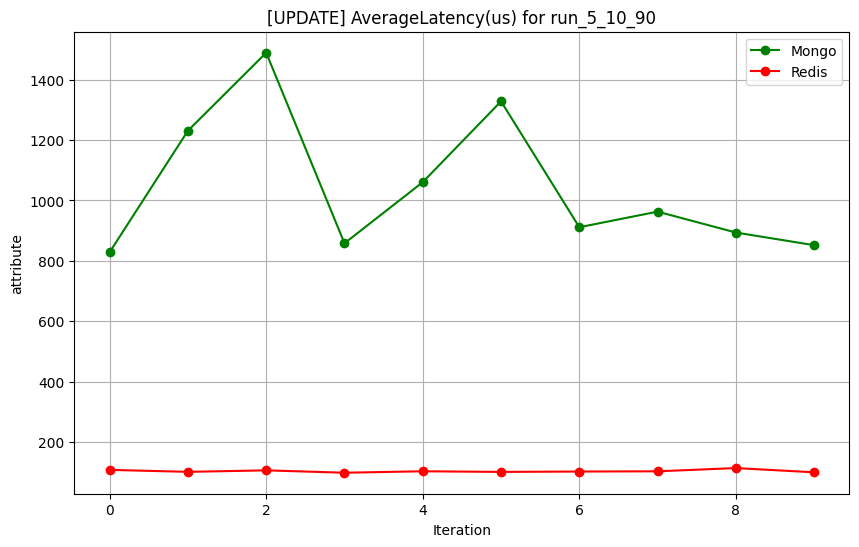

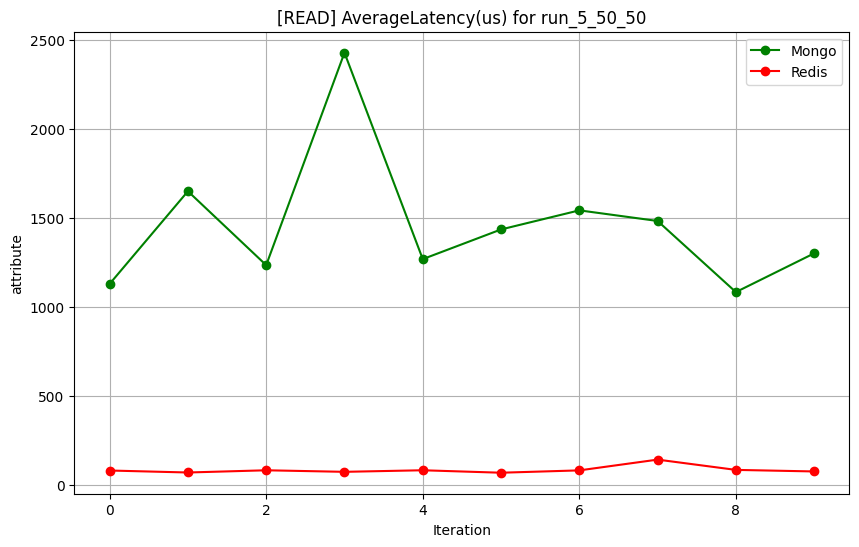

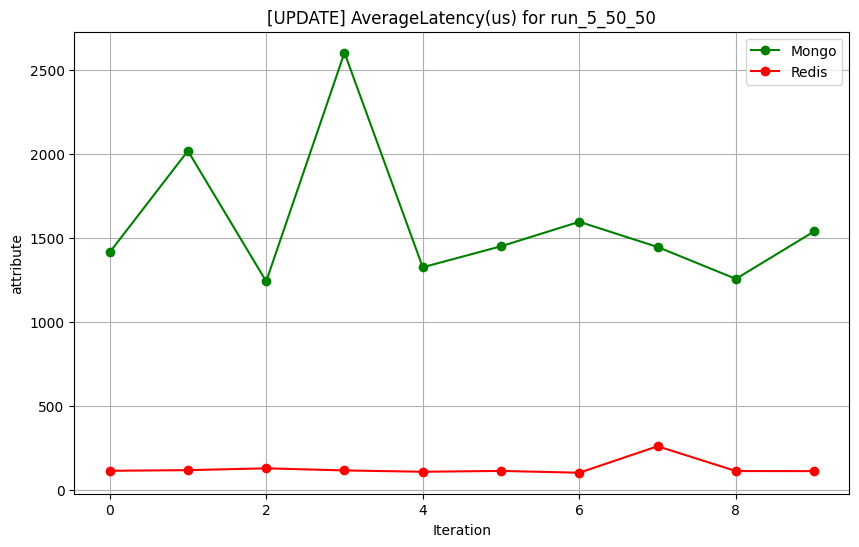

In [62]:
options = ['load_3_10_90', 'load_3_50_50', 'load_5_10_90', 'load_5_50_50', 'run_3_10_90', 'run_3_50_50', 'run_5_10_90',
           'run_5_50_50']

attributes_load = ['[INSERT] AverageLatency(us)']
attributes_run = ['[READ] AverageLatency(us)', '[UPDATE] AverageLatency(us)']

for option in options:
    pairs = load_dataframe_pairs(option)
    for i, pair in enumerate(pairs, start=1):
        mongo_df, redis_df = pair
        if option.startswith('load'):
            for attribute in attributes_load:
                display_compared_attribute(mongo_df, redis_df, attribute, option)
        else:
            for attribute in attributes_run:
                display_compared_attribute(mongo_df, redis_df, attribute, option)

In [63]:
def display_compared_attribute2(df_mongo, df_redis, attribute, option):
    plt.figure(figsize=(10, 6))
    plt.bar(attribute, height=df_mongo[attribute], label='Mongo')
    # plt.bar(df_redis[attribute], height=100,  label='Redis')
    plt.title(attribute + " for " + option)
    plt.xlabel('Iteration')
    plt.ylabel('attribute')
    plt.grid(True)
    plt.legend()
    plt.show()


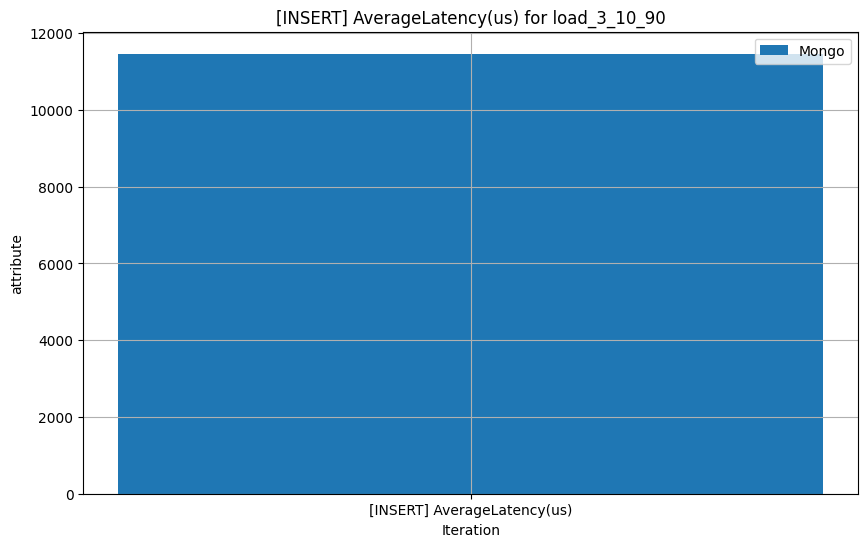

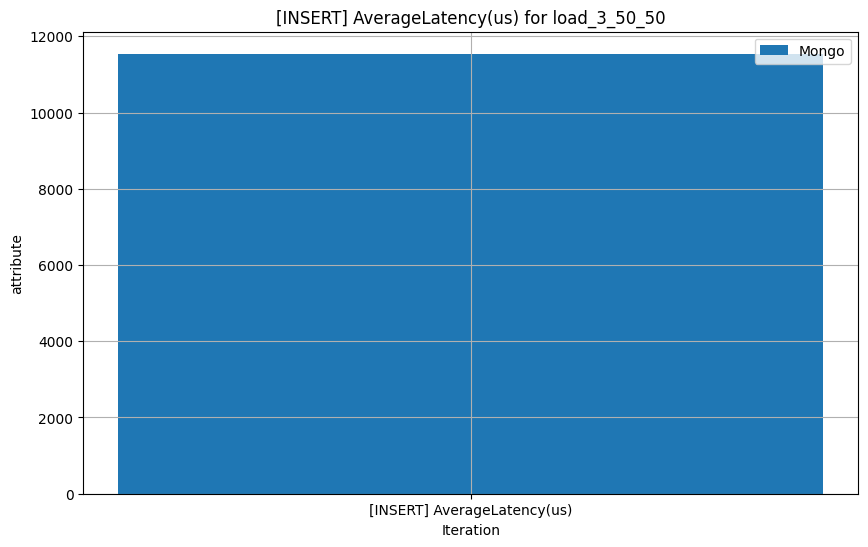

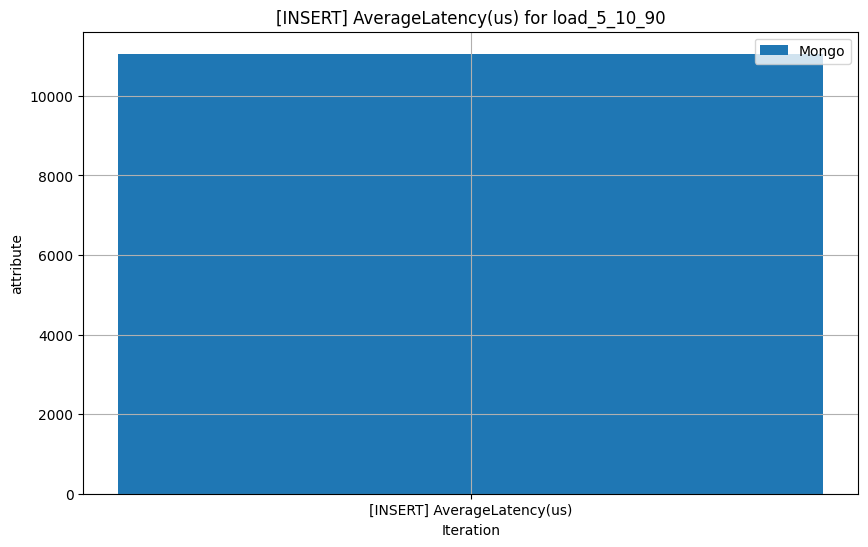

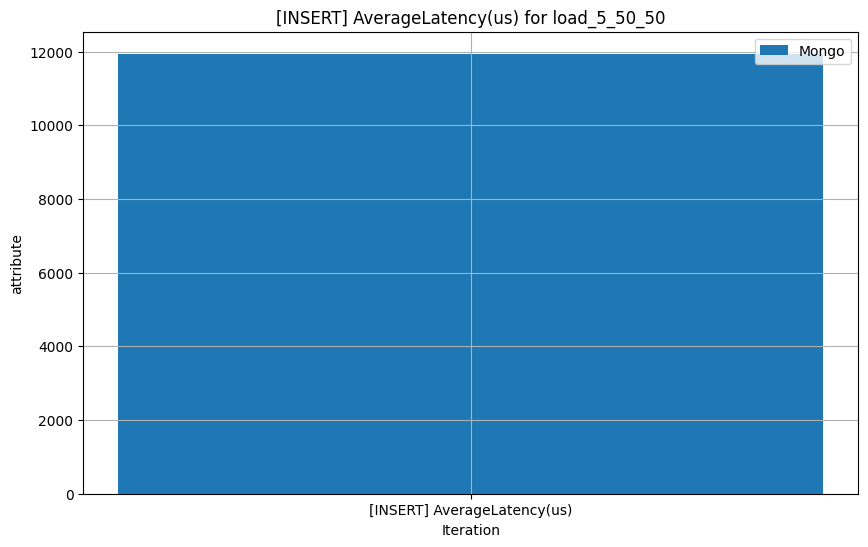

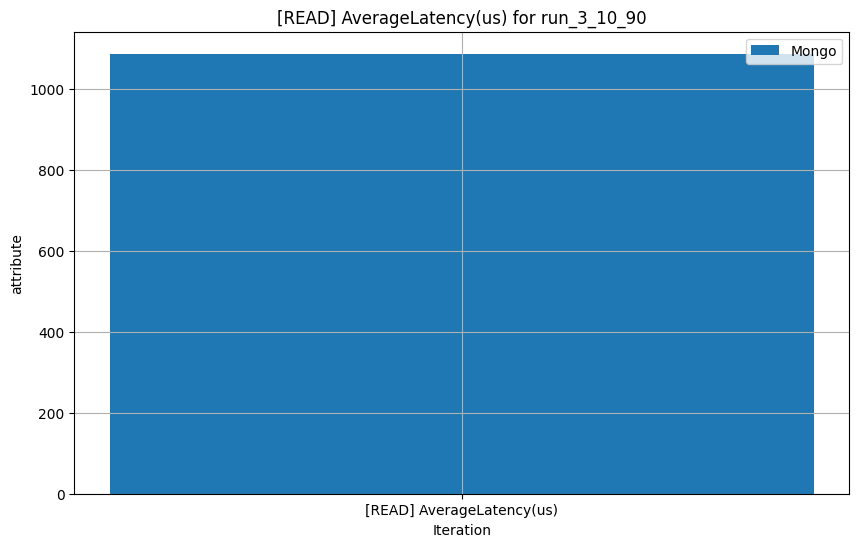

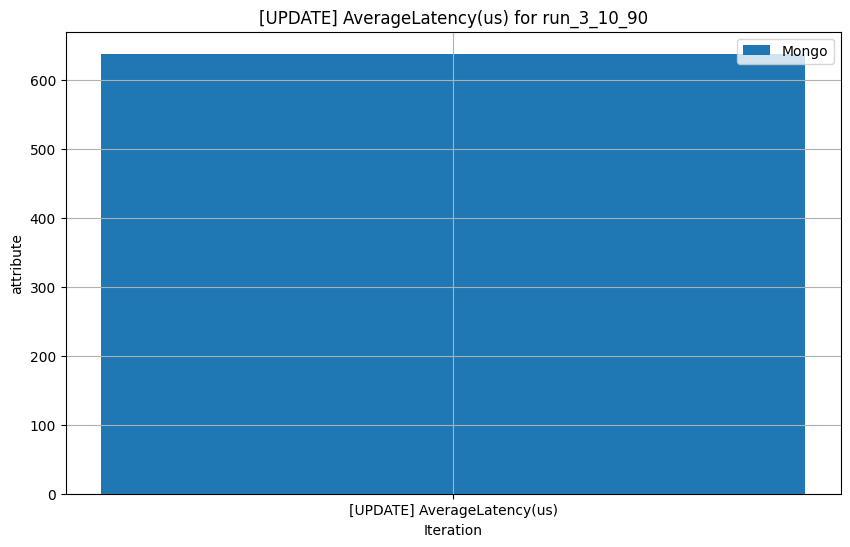

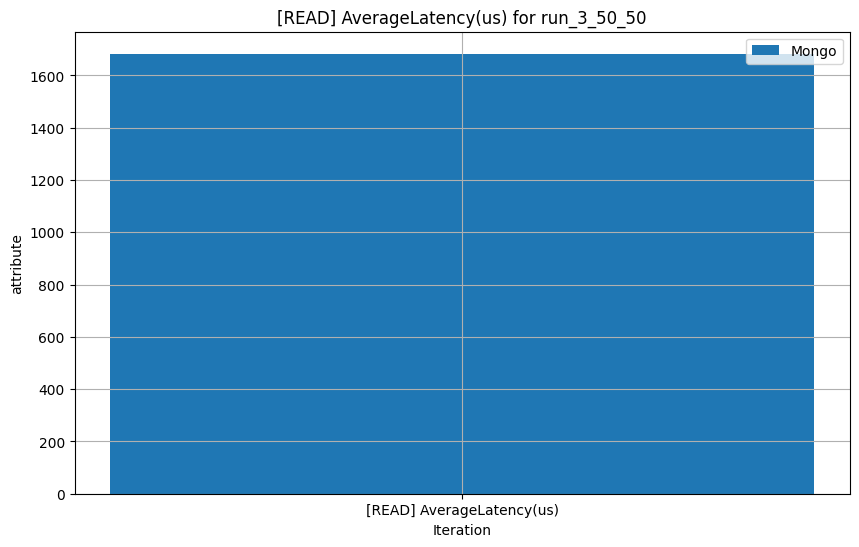

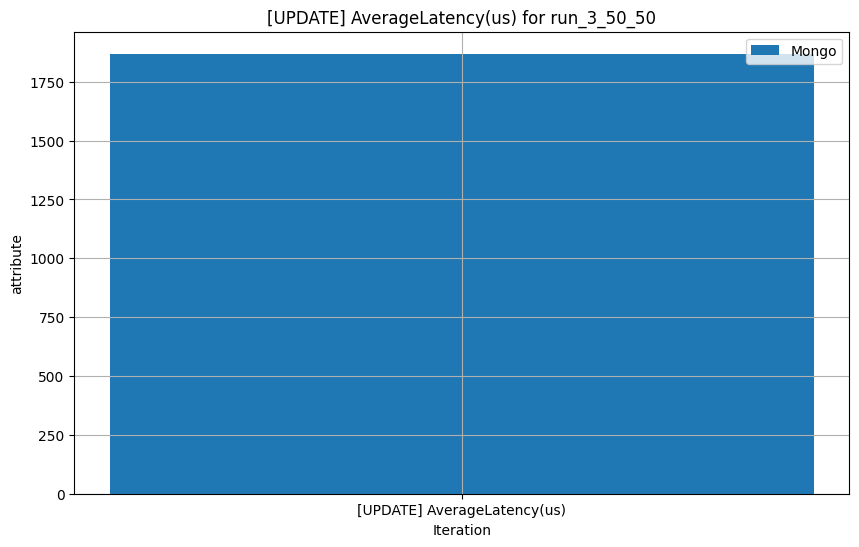

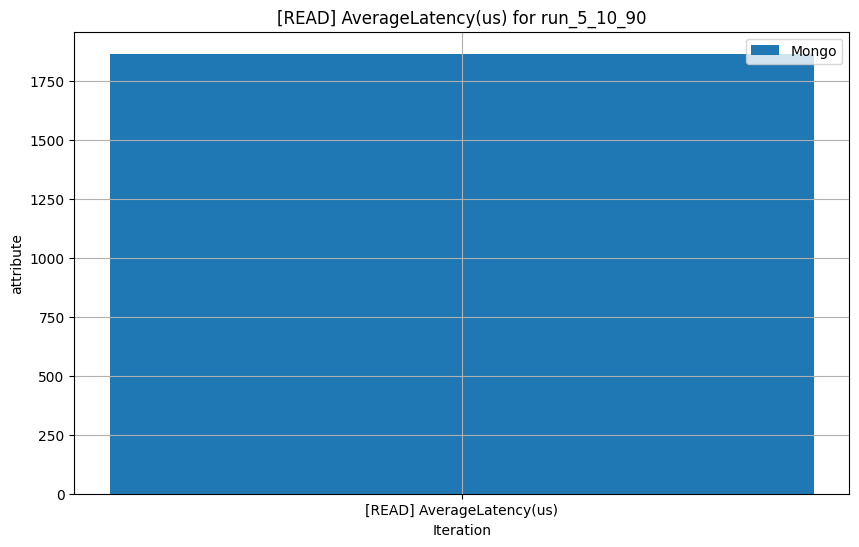

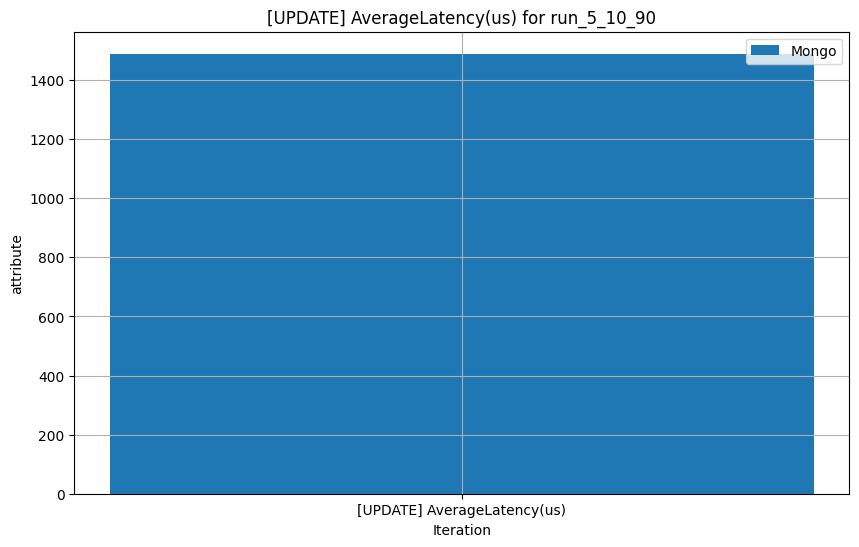

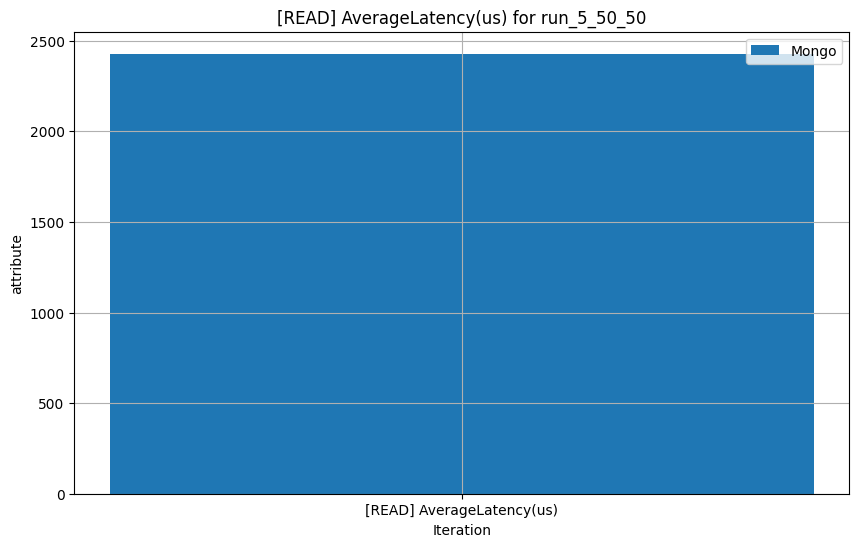

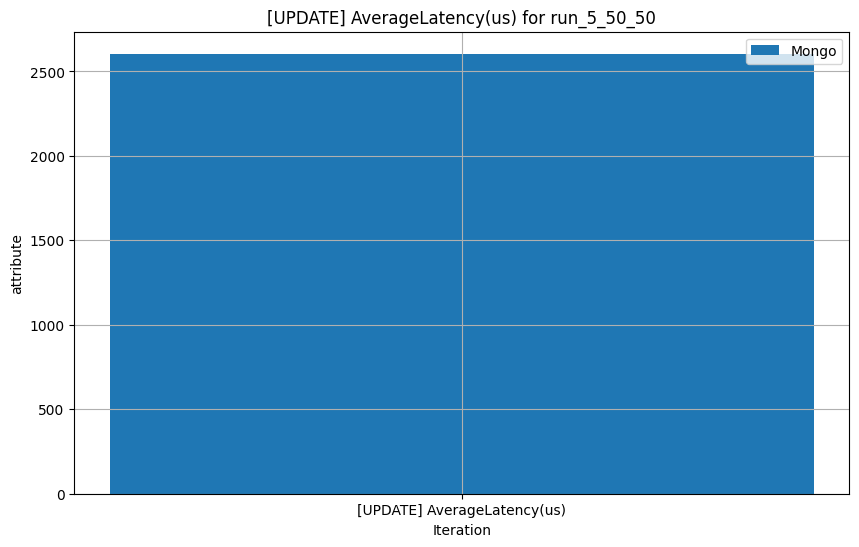

In [64]:
options = ['load_3_10_90', 'load_3_50_50', 'load_5_10_90', 'load_5_50_50', 'run_3_10_90', 'run_3_50_50', 'run_5_10_90',
           'run_5_50_50']

attributes_load = ['[INSERT] AverageLatency(us)']
attributes_run = ['[READ] AverageLatency(us)', '[UPDATE] AverageLatency(us)']

for option in options:
    pairs = load_dataframe_pairs(option)
    for i, pair in enumerate(pairs, start=1):
        mongo_df, redis_df = pair
        if option.startswith('load'):
            for attribute in attributes_load:
                display_compared_attribute2(mongo_df, redis_df, attribute, option)
        else:
            for attribute in attributes_run:
                display_compared_attribute2(mongo_df, redis_df, attribute, option)


In [65]:
mongoloaddf: pd.DataFrame = pd.DataFrame()
redisloaddf: pd.DataFrame = pd.DataFrame()
mongorundf: pd.DataFrame = pd.DataFrame()
redisrundf: pd.DataFrame = pd.DataFrame()

mongorundfthr: pd.DataFrame = pd.DataFrame()
redisrundfthr: pd.DataFrame = pd.DataFrame()
mongoloaddfthr: pd.DataFrame = pd.DataFrame()
redisloaddfthr: pd.DataFrame = pd.DataFrame()
for option in options:
    pairs = load_dataframe_pairs(option)
    for i, pair in enumerate(pairs, start=1):
        mongo_df, redis_df = pair
        if option.startswith('load'):
            for attribute in attributes_load:
                mongoloaddf['{option}-{attribute}'.format(option=option, attribute=attribute)] = mongo_df[attribute]
                redisloaddf['{option}-{attribute}'.format(option=option, attribute=attribute)] = redis_df[attribute]
                mongoloaddfthr['{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = mongo_df['[OVERALL] Throughput(ops/sec)']
                redisloaddfthr['{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = redis_df['[OVERALL] Throughput(ops/sec)']
        else:
            for attribute in attributes_run:
                mongorundf['{option}-{attribute}'.format(option=option, attribute=attribute)] = mongo_df[attribute]
                redisrundf['{option}-{attribute}'.format(option=option, attribute=attribute)] = redis_df[attribute]
                mongorundfthr['{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = mongo_df['[OVERALL] Throughput(ops/sec)']
                redisrundfthr['{option}-{attribute}'.format(option=option, attribute='[OVERALL] Throughput(ops/sec)')] = redis_df['[OVERALL] Throughput(ops/sec)']



In [66]:
mongoloaddf

,load_3_10_90-[INSERT] AverageLatency(us),load_3_50_50-[INSERT] AverageLatency(us),load_5_10_90-[INSERT] AverageLatency(us),load_5_50_50-[INSERT] AverageLatency(us)
0,9948.915,10005.228,10965.229,10583.542
1,10976.746,10085.127,10471.940,11560.669
2,9983.440,11326.461,11000.562,10146.838
3,10969.594,10167.237,11058.721,11943.084
4,10449.893,11543.306,10004.082,11087.198
5,10464.670,10652.591,10013.928,11436.821
6,10444.203,10052.860,10988.179,11106.370
7,11467.073,11056.386,9965.747,11002.047
8,10443.855,11453.441,10981.269,9563.974
9,10980.423,10824.703,10984.220,11648.576


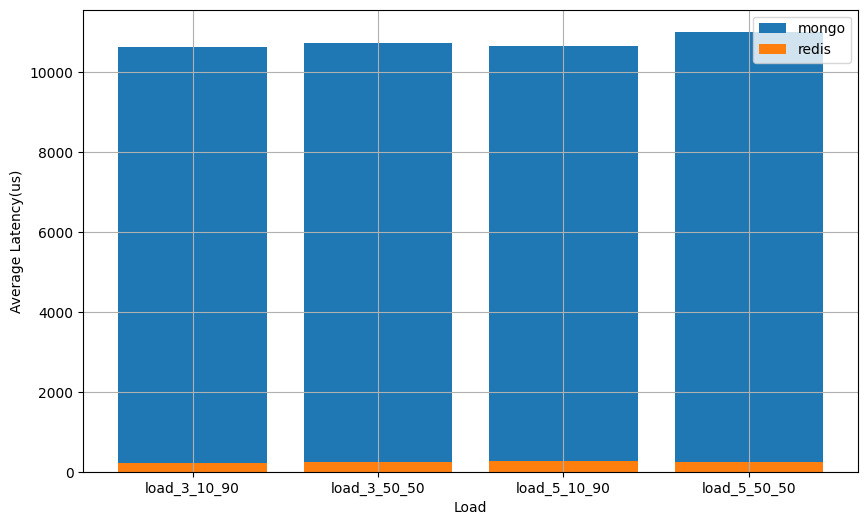

In [67]:

plt.figure(figsize=(10, 6))
plt.bar(mongoloaddf.columns.map(lambda x: x.split('-')[0]), height=mongoloaddf.mean(), label="mongo")
plt.bar(redisloaddf.columns.map(lambda x: x.split('-')[0]), height=redisloaddf.mean(), label="redis")
plt.xlabel('Load')
plt.ylabel('Average Latency(us)')
plt.grid(True)
plt.legend()
plt.show()


In [68]:
mongorundf

,run_3_10_90-[READ] AverageLatency(us),run_3_10_90-[UPDATE] AverageLatency(us),run_3_50_50-[READ] AverageLatency(us),run_3_50_50-[UPDATE] AverageLatency(us),run_5_10_90-[READ] AverageLatency(us),run_5_10_90-[UPDATE] AverageLatency(us),run_5_50_50-[READ] AverageLatency(us),run_5_50_50-[UPDATE] AverageLatency(us)
0,786.000000,393.671574,824.475104,1209.173745,942.097826,828.495595,1128.244618,1415.124744
1,752.846154,587.903190,833.090730,1005.464503,1866.575758,1230.976693,1649.377049,2020.449219
2,753.439252,588.334826,1683.055877,1753.623701,1652.287234,1489.395143,1233.717694,1242.714286
3,748.947917,582.148230,982.795359,930.121673,908.132653,858.082040,2428.313492,2605.024194
4,733.045045,632.920135,782.090000,967.582000,1225.970588,1060.543430,1267.649299,1326.756487
5,720.348315,601.160263,944.104925,1075.769231,1705.968421,1328.385635,1434.515337,1451.806262
6,759.306122,624.733925,1357.817097,1869.273642,1037.611650,911.306577,1541.888668,1597.603622
7,683.521008,613.426788,1166.275654,1468.644135,1089.425743,962.911012,1482.127273,1447.403960
8,1087.307692,638.289062,1551.460251,1423.318008,1000.436975,893.700341,1082.268775,1257.471660
9,751.722772,597.103448,929.088235,1190.248980,883.803738,851.742441,1300.127883,1540.529637


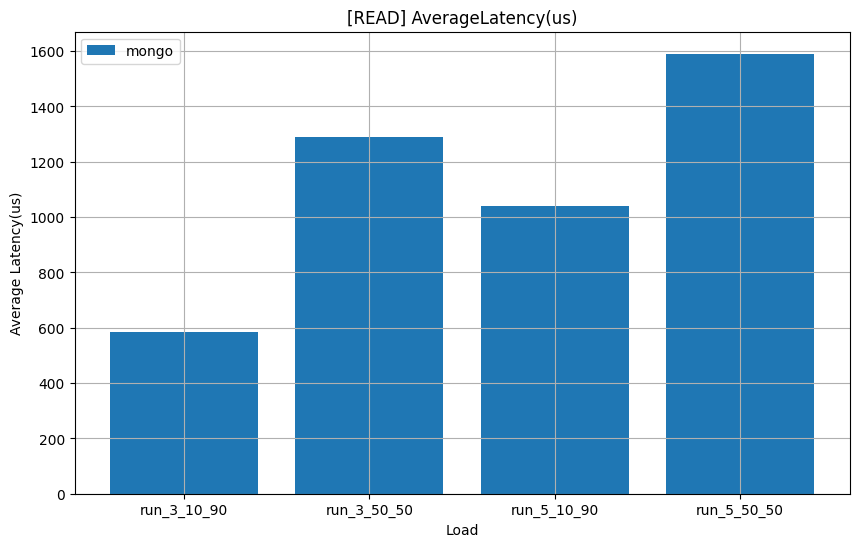

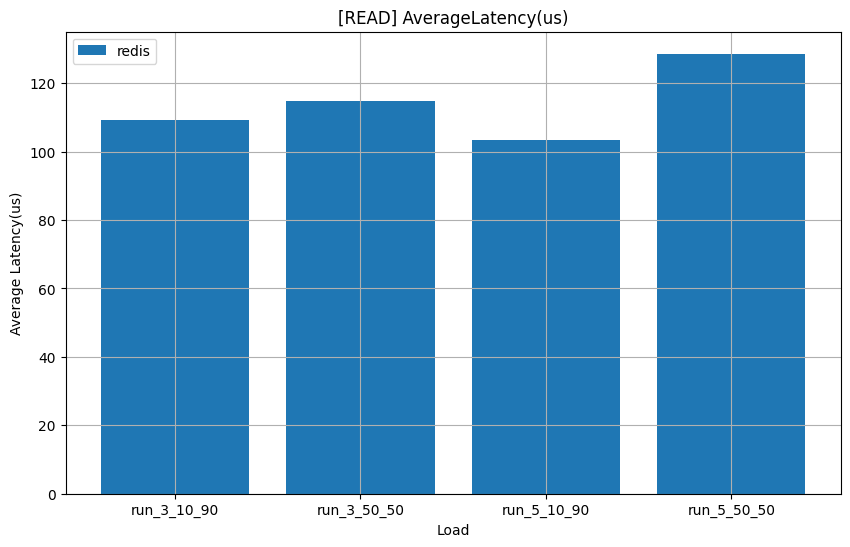

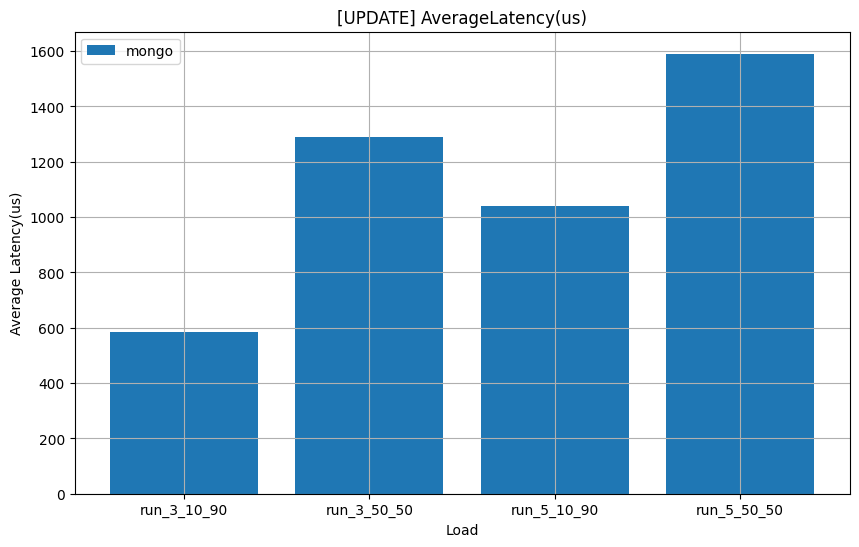

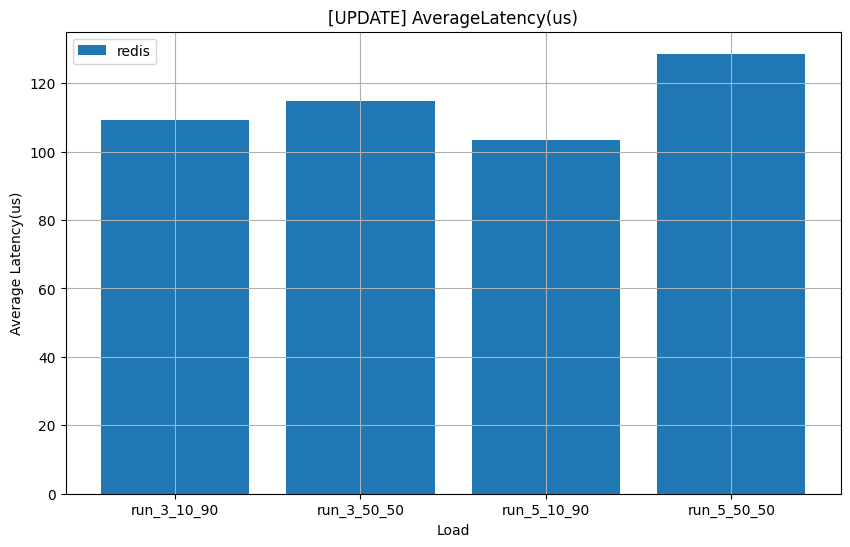

In [69]:
for col in attributes_run:
    plt.figure(figsize=(10, 6))
    plt.bar(list(map(lambda x: x.split('-')[0], filter(lambda y: 'UPDATE' in y, mongorundf.columns.values))),
            height=mongorundf.filter(like='UPDATE').mean(), label="mongo")
    plt.xlabel('Load')
    plt.ylabel('Average Latency(us)')
    plt.title(col)
    plt.grid(True)
    plt.legend()
    plt.figure(figsize=(10, 6))
    plt.bar(list(map(lambda x: x.split('-')[0], filter(lambda y: 'UPDATE' in y, redisrundf.columns.values))),
            height=redisrundf.filter(like='UPDATE').mean(), label="redis")
    plt.xlabel('Load')
    plt.ylabel('Average Latency(us)')
    plt.title(col)
    plt.grid(True)
    plt.legend()
    plt.show()


In [70]:
redisrundf

,run_3_10_90-[READ] AverageLatency(us),run_3_10_90-[UPDATE] AverageLatency(us),run_3_50_50-[READ] AverageLatency(us),run_3_50_50-[UPDATE] AverageLatency(us),run_5_10_90-[READ] AverageLatency(us),run_5_10_90-[UPDATE] AverageLatency(us),run_5_50_50-[READ] AverageLatency(us),run_5_50_50-[UPDATE] AverageLatency(us)
0,114.857143,85.452328,62.770492,90.978516,126.131313,107.392897,78.862823,114.088531
1,183.446602,137.397993,131.181818,200.893069,125.325581,100.897155,67.718929,117.876310
2,217.442308,161.276786,75.363107,88.261856,125.971963,105.780515,80.151452,128.716216
3,120.980198,86.311457,65.808943,96.187008,112.946429,97.970721,71.493976,116.143426
4,116.173077,93.960938,76.930279,89.355422,115.513274,102.774521,80.279678,108.363817
5,326.722222,182.531868,74.465753,103.490798,114.339450,100.663300,66.451613,113.275794
6,112.350877,85.116253,83.634766,84.155738,115.536082,101.910299,79.604000,102.524000
7,106.679612,81.824972,66.360465,97.929752,115.110000,102.636667,140.167315,260.310700
8,101.184874,81.653802,77.288000,91.720000,129.358696,113.376652,82.375796,112.533081
9,128.060000,97.948889,163.621677,203.982387,125.822222,99.346154,73.607495,112.062880


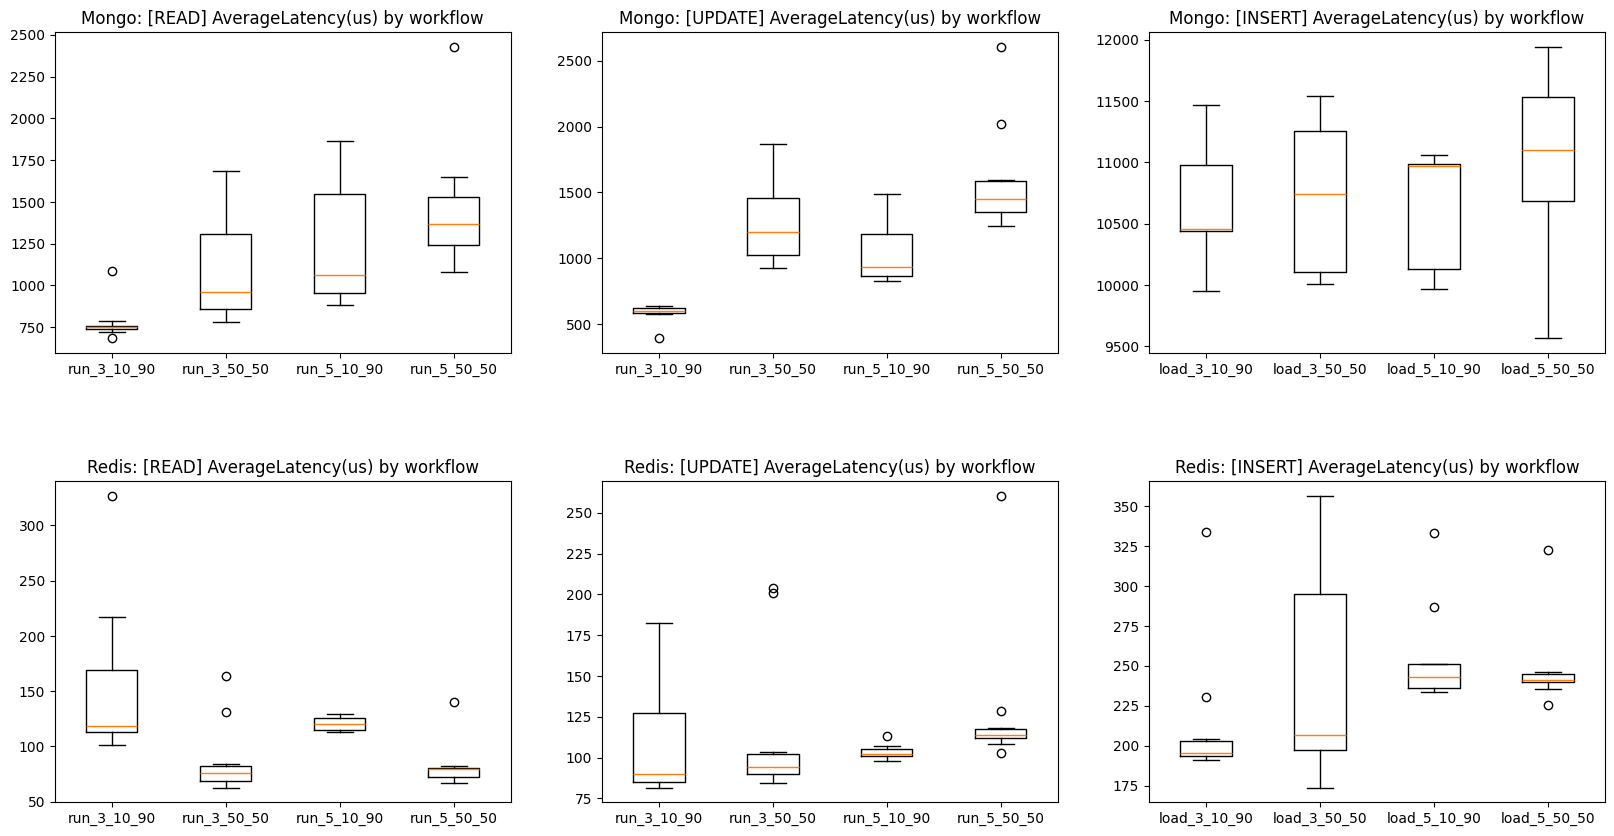

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))  # 2 rows, 2 columns

for i, col in enumerate(attributes_run):
    axs[0, i].boxplot(mongorundf.filter(like=col.split(' ')[0]),
                      labels=mongorundf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[0, i].set_title('Mongo: ' + col + ' by workflow')

    axs[1, i].boxplot(redisrundf.filter(like=col.split(' ')[0]),
                      labels=redisrundf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[1, i].set_title('Redis: ' + col + ' by workflow')

for i, col in enumerate(attributes_load):
    axs[0, 2].boxplot(mongoloaddf.filter(like=col.split(' ')[0]),
                      labels=mongoloaddf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[0, 2].set_title('Mongo: ' + col + ' by workflow')

    axs[1, 2].boxplot(redisloaddf.filter(like=col.split(' ')[0]),
                          labels=redisloaddf.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[1, 2].set_title('Redis: ' + col + ' by workflow')
fig.subplots_adjust(hspace=0.4)
plt.show()

In [72]:
attributes_load_thr = ['[OVERALL] Throughput(ops/sec)']
redisrundfthr

,run_3_10_90-[OVERALL] Throughput(ops/sec),run_3_50_50-[OVERALL] Throughput(ops/sec),run_5_10_90-[OVERALL] Throughput(ops/sec),run_5_50_50-[OVERALL] Throughput(ops/sec)
0,7518.796992,8333.333333,6369.426752,7042.253521
1,4761.904762,3816.793893,6711.409396,7246.376812
2,4366.812227,8000.000000,6369.426752,6535.947712
3,7352.941176,8000.000000,6849.315068,7092.198582
4,6993.006993,7692.307692,6622.516556,7092.198582
5,3571.428571,6944.444444,6756.756757,7407.407407
6,6993.006993,7575.757576,6756.756757,7407.407407
7,7751.937984,7936.507937,6711.409396,3164.556962
8,7812.500000,7812.500000,6172.839506,6993.006993
9,6711.409396,3508.771930,6756.756757,7142.857143


[OVERALL] Throughput(ops/sec) 0


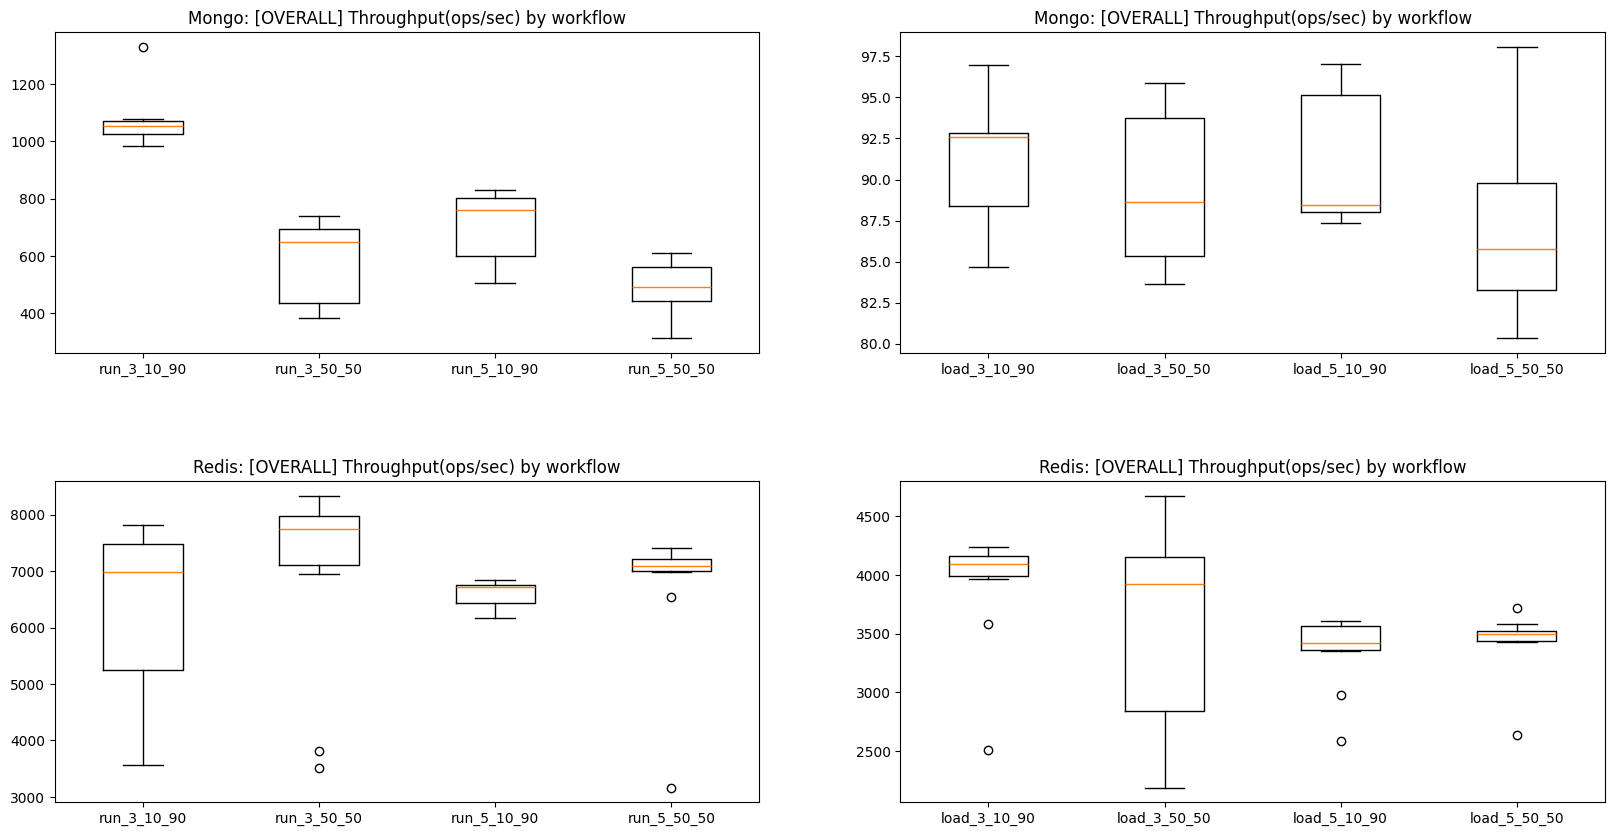

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))  # 2 rows, 2 columns

for i, col in enumerate(attributes_load_thr):
    print(col, i)
    axs[0, 0].boxplot(mongorundfthr.filter(like=col.split(' ')[0]),
                      labels=mongorundfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[0, 0].set_title('Mongo: ' + col + ' by workflow')

    axs[1, 0].boxplot(redisrundfthr.filter(like=col.split(' ')[0]),
                      labels=redisrundfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[1, 0].set_title('Redis: ' + col + ' by workflow')

for i, col in enumerate(attributes_load_thr):
    axs[0, 1].boxplot(mongoloaddfthr.filter(like=col.split(' ')[0]),
                      labels=mongoloaddfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[0, 1].set_title('Mongo: ' + col + ' by workflow')

    axs[1, 1].boxplot(redisloaddfthr.filter(like=col.split(' ')[0]),
                      labels=redisloaddfthr.filter(like=col.split(' ')[0]).columns.map(lambda x: x.split('-')[0]))
    axs[1, 1].set_title('Redis: ' + col + ' by workflow')
fig.subplots_adjust(hspace=0.4)
plt.show()